# Corona Virus in the US

In [1]:
#data wrangle
import pandas as pd
import numpy as np
import json

#viz
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Aquire - deaths by county

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53848 entries, 0 to 53847
Data columns (total 6 columns):
date      53848 non-null object
county    53848 non-null object
state     53848 non-null object
fips      53132 non-null float64
cases     53848 non-null int64
deaths    53848 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ MB


In [4]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


### Prepare

In [5]:
df.isnull().sum()

date        0
county      0
state       0
fips      716
cases       0
deaths      0
dtype: int64

In [6]:
df [df.fips.isnull()]

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
418,2020-03-01,Unknown,Rhode Island,NaN,2,0
448,2020-03-02,New York City,New York,NaN,1,0
450,2020-03-02,Unknown,Rhode Island,NaN,2,0
482,2020-03-03,New York City,New York,NaN,2,0
...,...,...,...,...,...,...
53533,2020-04-12,Unknown,Utah,NaN,6,7
53549,2020-04-12,Unknown,Vermont,NaN,11,0
53553,2020-04-12,Unknown,Virgin Islands,NaN,51,1
53667,2020-04-12,Unknown,Virginia,NaN,0,68


In [7]:
df [df.fips.isnull()].county.value_counts()

Unknown          649
New York City     43
Kansas City       24
Name: county, dtype: int64

### Explore

In [8]:
states = df.groupby(df.state).sum()[["cases","deaths"]]

In [9]:
states["death_rate"] = round(states.deaths / states.cases * 100,2)

In [10]:
states.index.name = "state"

In [11]:
states.sort_values("death_rate", ascending=False)

,cases,deaths,death_rate
state,,,
Northern Mariana Islands,117,18,15.38
Washington,143806,7025,4.89
Michigan,250388,11127,4.44
Kentucky,18407,813,4.42
Puerto Rico,7701,337,4.38
Oklahoma,19707,844,4.28
Vermont,8493,352,4.14
Louisiana,206619,7836,3.79
Georgia,125469,4376,3.49


> The death rate is misleading, as it's based on the number of cases confirmed. This is a problem since there is insufficient testing nationwide, and it is very uncertain how many cases there actually is. 

#### Add population data

State population data obtained from https://worldpopulationreview.com/states/

In [12]:
with open('data.json') as f:
    data = json.load(f)

In [13]:
pop = pd.DataFrame(data['data'])

In [14]:
df_state = pd.merge(states,pop, left_on="state", right_on="State")

In [15]:
df_state.head()

,cases,deaths,death_rate,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
0,32909,757,2.30,24,Alabama,4908621,0.0042,4887871,4785448,0.0257,0.0147,96.9221
1,3278,60,1.83,49,Alaska,734002,-0.0047,737438,713906,0.0281,0.0022,1.2863
2,36766,934,2.54,14,Arizona,7378494,0.0288,7171646,6407774,0.1515,0.0221,64.9550
3,15980,268,1.68,33,Arkansas,3038999,0.0084,3013825,2921978,0.0400,0.0091,58.4030
4,258570,6315,2.44,1,California,39937489,0.0096,39557045,37320903,0.0701,0.1194,256.3727


> Retaining only the "Pop" column, as it's reflective of 2020. 

In [16]:
df_state = df_state[["cases","deaths","death_rate","State","Pop"]]
df_state.columns = [x.lower() for x in df_state.columns]

In [17]:
df_state = df_state.set_index("state")

In [18]:
df_state.head()

,cases,deaths,death_rate,pop
state,,,,
Alabama,32909,757,2.30,4908621
Alaska,3278,60,1.83,734002
Arizona,36766,934,2.54,7378494
Arkansas,15980,268,1.68,3038999
California,258570,6315,2.44,39937489


In [19]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Alabama to Wyoming
Data columns (total 4 columns):
cases         52 non-null int64
deaths        52 non-null int64
death_rate    52 non-null float64
pop           52 non-null int64
dtypes: float64(1), int64(3)
memory usage: 2.0+ KB


Let's check out the rates by 1,0000 people. 

In [20]:
df_state["cases_p_1000"] = round(df_state.cases / df_state["pop"] * 1000, 2)
df_state["deaths_p_1000"] = round(df_state.deaths / df_state["pop"] * 1000, 2)

In [21]:
df_state.sort_values("cases_p_1000", ascending=False).head()

,cases,deaths,death_rate,pop,cases_p_1000,deaths_p_1000
state,,,,,,
New York,2100891,70590,3.36,19440469,108.07,3.63
New Jersey,600462,16439,2.74,8936574,67.19,1.84
Louisiana,206619,7836,3.79,4645184,44.48,1.69
Massachusetts,219947,4849,2.20,6976597,31.53,0.70
Connecticut,105188,3661,3.48,3563077,29.52,1.03


In [22]:
df_state.sort_values("deaths_p_1000", ascending=False).head()

,cases,deaths,death_rate,pop,cases_p_1000,deaths_p_1000
state,,,,,,
New York,2100891,70590,3.36,19440469,108.07,3.63
New Jersey,600462,16439,2.74,8936574,67.19,1.84
Louisiana,206619,7836,3.79,4645184,44.48,1.69
Michigan,250388,11127,4.44,10045029,24.93,1.11
Connecticut,105188,3661,3.48,3563077,29.52,1.03


> The `deaths_p_1000` is probably the number that is most reflective of the damage the virus is causing within a state. As all states have insufficient testing and it is truly unknown how much the virus has spread.  

### Texas Counties

In [23]:
df_texas = df [df.state == "Texas"]

In [24]:
df_texas.county.value_counts()

Bexar        61
Fort Bend    40
Harris       39
Collin       35
Tarrant      34
             ..
Stephens      3
Howard        3
Hall          3
Winkler       3
Dimmit        2
Name: county, Length: 182, dtype: int64

In [25]:
df_texas.date = pd.to_datetime(df_texas.date)
df_texas = df_texas.set_index("date")
df_texas = df_texas[["county","cases","deaths"]]

In [26]:
top_cases = df_texas.groupby("county").max().sort_values("cases",ascending=False).head(10).index

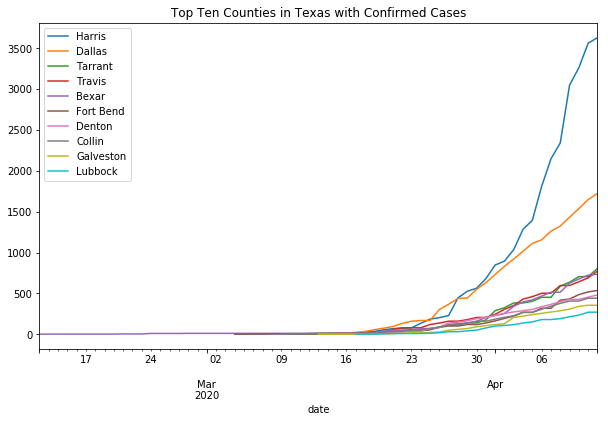

In [27]:
plt.figure(figsize=(10,6))

for x in top_cases:
    df_texas [df_texas.county == x]["cases"].plot()
plt.legend(labels=top_cases)
plt.title("Top Ten Counties in Texas with Confirmed Cases")
plt.show()